# GA Lab: iPython Notebook / Python

## iPython Notebooks

- Shift + Enter executes the current highlight cell
- Shift + Tab help for current command

In [1]:
from IPython.core.display import HTML
HTML("<iframe src=http://www.nature.com/news/ipython-interactive-demo-7.21492 width=1000 height=800></iframe>")

##Python

###Installing Packages:
####With Anaconda:
***conda install package-name***
####With Pip:
***sudo pip install package-name***
####With easy_install
***sudo easy_install package-name***

Let's try installing matplotlib:  
From a terminal window run ***conda install matplotlib***

### Importing Modules
   Python has a core set of modules that are accessible by default.  To make your session aware of other packages with different functionalities, you must call the import command to import the respective packages.  Let's try importing some packages that we'll be using frequently in this course, namely numpy, pandas, matplotlib, and scipy.  
   
   Notice that we've used "as" to ***alias*** the imported packages.  Thus, when we want to refer to these packages later in our code, we can reference them by these aliases.  We will frequently use these aliases for these specific packages.
   
   The special call to "**%matplotlib inline**" directs the iPython Notebook to display all plots generated by matplotlib inline, aka not in a separate window.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

%matplotlib inline

In [2]:
%timeit a = np.random.rand(100, 100)

The slowest run took 18.88 times longer than the fastest. This could mean that an intermediate result is being cached 
10000 loops, best of 3: 108 µs per loop


In [3]:
%%time
mu, sigma = 0, 0.1
normal_dist = np.random.normal(mu, sigma, 1000)

CPU times: user 137 µs, sys: 21 µs, total: 158 µs
Wall time: 112 µs


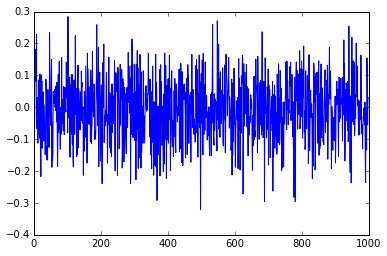

In [4]:
plt.plot(normal_dist)

In [5]:
import pandas.io.data
import datetime
aapl = pd.io.data.get_data_yahoo('FB', 
                                 start=datetime.datetime(2015, 4, 1), 
                                 end=datetime.datetime(2015, 4, 28))
aapl.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2015-04-01,82.500000,82.720001,80.870003,81.669998,22058200,81.669998
2015-04-02,82.250000,82.559998,81.440002,81.559998,19664100,81.559998
2015-04-06,80.800003,82.809998,80.800003,82.440002,19062900,82.440002
2015-04-07,82.650002,83.419998,82.220001,82.320000,17467000,82.320000
2015-04-08,82.629997,83.099998,81.839996,82.279999,18966700,82.279999


## Plotting!

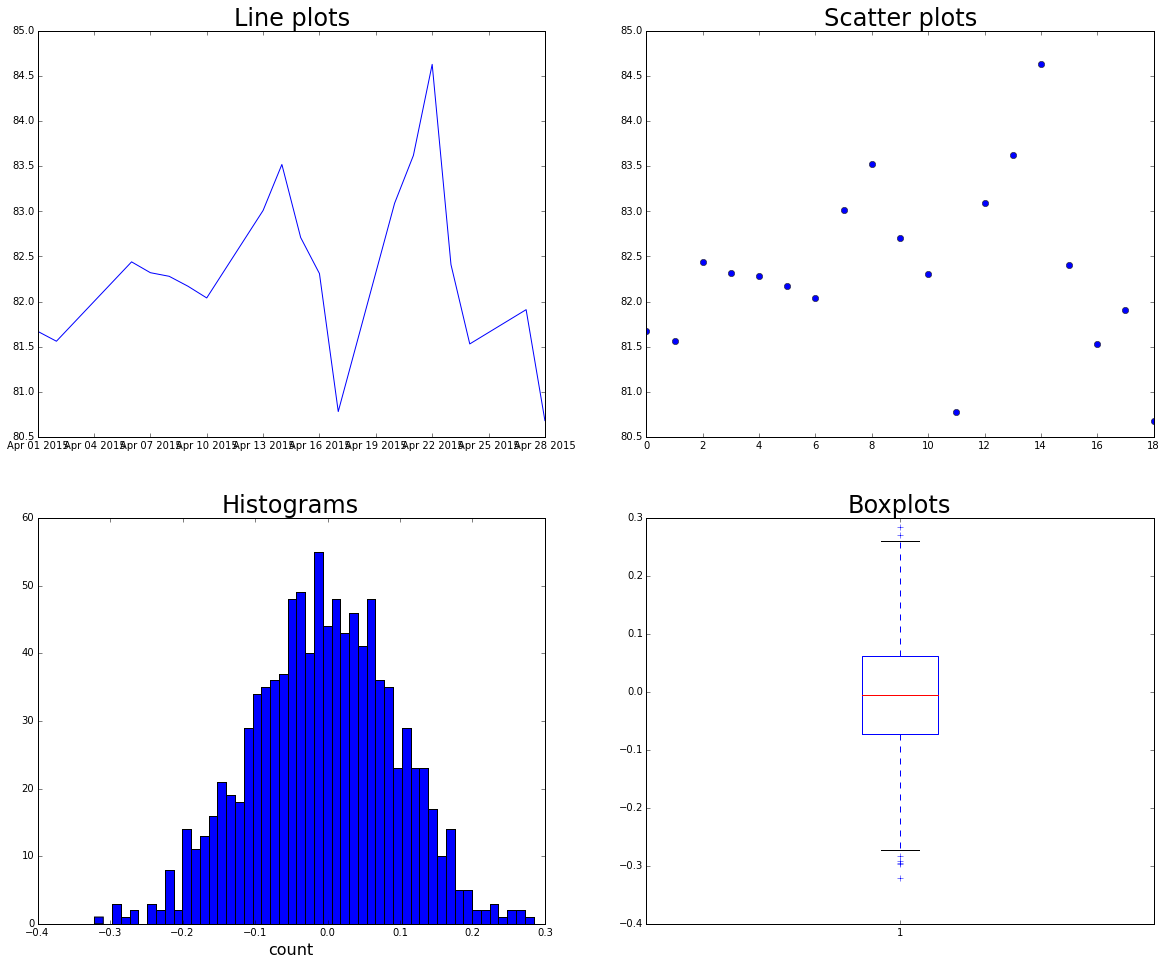

In [6]:
fig = plt.figure(figsize=(20,16))

ax = fig.add_subplot(2,2,1)
ax.plot(aapl.index, aapl['Close'])
ax.set_title('Line plots', size=24)

ax = fig.add_subplot(2,2,2)
ax.plot(aapl['Close'], 'o')
ax.set_title('Scatter plots', size=24)

ax = fig.add_subplot(2,2,3)
ax.hist(normal_dist, bins=50)
ax.set_title('Histograms', size=24)
ax.set_xlabel('count', size=16)

ax = fig.add_subplot(2,2,4)
ax.boxplot(normal_dist)
ax.set_title('Boxplots', size=24)
print

### 1. Python Data types
Python has a variety of datatypes.  The most basic are int, float, boolean and string.  Here are some examples of each and how we define variables of given types.  Because Python is dynamically typed, we don't have to explicitly state a variable's datatype, the interpreter will figure that out on its own.

In [7]:
# Int -- Anything following a "#" is a comment in Python and will be ignored
i = 100
# Float
f = 100.0
# boolean
b = False
# string
s = 'Paul'

We can print out the datatypes of each variable using the type() function.  The code below prints out each variable's value next to its datatype using string concatenation.  In order to concatenate a non-string datatype with a string, we must first use the str() function to convert the variable to a string.  There are similar conversion functions to convert between the other datatypes.

In [8]:
print "i: " + str(i) + " " + str(type(i))
print "f: " + str(f) + " " + str(type(f))
print "b: " + str(b) + " " + str(type(b))
print "s: " + str(s) + " " + str(type(s))

i: 100 <type 'int'>
f: 100.0 <type 'float'>
b: False <type 'bool'>
s: Paul <type 'str'>


The **math** module contains functions and variables involved in common basic mathematical operations.  Let's import it and watch it in action.  Here w

In [9]:
import math
print type(math.pi)
print math.pi
print math.sqrt(i)
print math.sqrt(f)

<type 'float'>
3.14159265359
10.0
10.0


The sqrt() call used above is an example of a function in Python.  Python functions are methods that act on objects, taking a prescribed number of parameters, doing some manipulation on them, and then returning a result.  Everything in Python is an object ("Object-oriented programming"), and each type of object has its own functions that can be called on that object.  Programmers can create their own functions, as will be discussed below.

### 2. Basic Python execution

In [10]:
test_integer = 42
test_float = math.pi
test_string = 'matt'

#### Basic print

In [11]:
print (test_integer, test_float, test_string)

(42, 3.141592653589793, 'matt')


#### C-style formatting

In [12]:
print ("%d %f %s") % (test_integer, test_float, test_string)
print ("%d %.2f %s") % (test_integer, test_float, test_string)

42 3.141593 matt
42 3.14 matt


#### Format - the pythonic way

In [14]:
print ("{} {} {}").format(test_integer, test_float, test_string)
print ("{} {:.2f} {}").format(test_integer, test_float, test_string)

42 3.14159265359 matt
42 3.14 matt


### Python operations

Like most programming languages, Python is a handy calculator for numeric data.  All of the basic arithmetic operations can be performed.

####Addition

In [15]:
print 1 + 2.5
print i + 32

3.5
132


####Subtraction

In [16]:
print 12 - 9
print f - 27.5

3
72.5


####Multiplication

In [17]:
print 5.2*12
print i*f

62.4
10000.0


####Division
It's important to note that in division of integers Python will use integer division, that is it will round down to the nearest integer.  To force it to return a float, you must make sure to convert at least one of the quantities to a float first.

In [18]:
print 60/11
print float(60)/11
print i/f

5
5.45454545455
1.0


####Modulo/Remainder

In [20]:
print 10 % 3
print i % 8

1
4


####Exponentiation

In [21]:
print 3**3
print i**2

27
10000


####Order of Operations
Python follows the usual order of operations: Parenthesis, Exponents, Multiplication, Division, Addition, Subtraction (PEMDAS)

In [22]:
print (i/2) - 3**2 + 12 % 5

43


### 3. Python Data Structures

#### Lists [ ]

- aka arrays
- ordered
- mutable
- mixed types 

In [23]:
price_per_sq_foot = [300,324,220,976,347,888,134,95,567,1400,120]
print type(price_per_sq_foot)

<type 'list'>


#### list operations:

In [27]:
#Number of elements in the list
print "There are {} elements in the list".format(len(price_per_sq_foot))
print

#Add an item to the end of the list
price_per_sq_foot.append(1000)
print "Updated price per square foot"
print (price_per_sq_foot)

#Remove and return most recent element
last_element = price_per_sq_foot.pop()
print "Last in, updated price per sq foot"
print (last_element, price_per_sq_foot)

#Sort the array
print "Sorted list"
print sorted(price_per_sq_foot)

#Reverse order
print "Reverse order"
print sorted(price_per_sq_foot)[::-1]

There are 11 elements in the list

Updated price per square foot
[300, 324, 220, 976, 347, 888, 134, 95, 567, 1400, 120, 1000]
Last in, updated price per sq foot
(1000, [300, 324, 220, 976, 347, 888, 134, 95, 567, 1400, 120])
Sorted list
[95, 120, 134, 220, 300, 324, 347, 567, 888, 976, 1400]
Reverse order
[1400, 976, 888, 567, 347, 324, 300, 220, 134, 120, 95]


#### List slicing
You can select any element(s) from a list that you like by using the index (first element is 0) or a range of indices.

In [26]:
#First element
sorted_ppsf = sorted(price_per_sq_foot)
print "First element"
print 'Cheapest: {}'.format(sorted_ppsf[0:len(price_per_sq_foot):2])
print 
print "Last element"
print 'Most expensive: {}'.format(sorted_ppsf[len(sorted_ppsf) - 1])
#or
print 'Most expensive: {}'.format(sorted_ppsf[-1])

First element
Cheapest: [95, 134, 300, 347, 888, 1400]

Last element
Most expensive: 1400
Most expensive: 1400


#### Tuples ( )

- immutable
- can't change / sort
- functional programming

In [28]:
test = (1, 2)
print test[0]
print test[1]
test[0] = test[1]

1
2


TypeError: 'tuple' object does not support item assignment

#### Dictionaries { }

- aka associate arrays / key-value pairs
- mutable
- unordered

In [29]:
#Can contain multiple types
employee_info = {'id': 123, 'name': 'Matthew', 'manages': [45,67,90], 'managed_by': 2}
print "Name {}: Headcount: {}".format(employee_info['name'], len(employee_info['manages']))

Name Matthew: Headcount: 3


In [30]:
offensive_skill_dict = {'RB': 'Running Back', 'WR': 'Wide Receiver', 'QB': 'Quarterback', 'FB': 'Full back', 'TE': 'Tight End'}
print offensive_skill_dict

{'FB': 'Full back', 'QB': 'Quarterback', 'WR': 'Wide Receiver', 'RB': 'Running Back', 'TE': 'Tight End'}


In [31]:
print offensive_skill_dict.keys()

['FB', 'QB', 'WR', 'RB', 'TE']


#### Sets

- unique
- cool operations

In [32]:
#remove redundant entries
list_list = [1,1,2,4,6,8,3,1,2,4,5]
set_list = set(list_list)
print set_list

set([1, 2, 3, 4, 5, 6, 8])


In [33]:
#Set operations
panel_a, panel_b = set(('BRCA1', 'BRCA2', 'TP53', 'CHEK2', 'MYC')), set(('CHEK2', 'SPHK1', 'MYCN', 'MYC'))

print "Genes in panel 1 but not in panel b: {}\n".format((panel_a - panel_b))
print "Genes in both panels (Intersection): {}\n".format(panel_a & panel_b)
print "All the genes: {}\n".format(panel_a | panel_b)
print "Genes in A that aren't in B, genes in B that aren't in A (symmetric difference): {}\n".format(panel_a ^ panel_b)


Genes in panel 1 but not in panel b: set(['BRCA1', 'BRCA2', 'TP53'])

Genes in both panels (Intersection): set(['MYC', 'CHEK2'])

All the genes: set(['BRCA1', 'MYCN', 'SPHK1', 'BRCA2', 'TP53', 'MYC', 'CHEK2'])

Genes in A that aren't in B, genes in B that aren't in A (symmetric difference): set(['BRCA1', 'MYCN', 'SPHK1', 'BRCA2', 'TP53'])



### 4. flow control
Like most languages, Python provides mechanism for conditional behavior and for iterating through list-like structures (dicts, lists, etc).

####If/Else Statements
If and Else statements allow a program to take conditional actions based on boolean conditions.  Below is an example of an if/elif/else group.

In [34]:
if i > 90 and f < 100:
    print 'IF'
elif f > 100:
    print 'ELIF'
else:
    print 'ELSE'

ELSE


In [35]:
if i > 90 and f < 100:
    print 'IF'
elif f != 110:
    print 'ELIF'
else:
    print 'ELSE'

ELIF


In [36]:
if i > 90 and f <= 100:
    print 'IF'
elif f > 110:
    print 'ELIF'
else:
    print 'ELSE'

IF


#### iterating through a list

In [37]:
my_list = ['Jimmy Carter','Ronald Regan','George Bush','Bill Clinton', 'George HW Bush', 'Barack Obama']

In [38]:
#Not the best way
for index in range(0, len(my_list)):
    print my_list[index]

Jimmy Carter
Ronald Regan
George Bush
Bill Clinton
George HW Bush
Barack Obama


In [39]:
#Better
for president in my_list:
    print (president)

Jimmy Carter
Ronald Regan
George Bush
Bill Clinton
George HW Bush
Barack Obama


In [40]:
#what if I want the index too
for index, president in enumerate(my_list):
    print index, president

0 Jimmy Carter
1 Ronald Regan
2 George Bush
3 Bill Clinton
4 George HW Bush
5 Barack Obama


In [41]:
print enumerate(my_list)

In [43]:
#list comprehension - this is pythonic - and faster!
[x + ' Hello' for x in my_list]

['Jimmy Carter Hello',
 'Ronald Regan Hello',
 'George Bush Hello',
 'Bill Clinton Hello',
 'George HW Bush Hello',
 'Barack Obama Hello']

#### Faster?

In [109]:
%%timeit
result = []
for x in range(1,10000):
    for y in range(1,10000):
        result.append(x)
len(result)

1 loops, best of 3: 9.58 s per loop


In [110]:
%%timeit
field = [x for x in range(1,10000) for y in range(1,10000)]
len(field)

1 loops, best of 3: 4.04 s per loop


###5. Python Functions
As mentioned earlier, you can define your own functions in Python.  Here is an example of how you might do that if you wanted to build a function for exponentiation:

In [44]:
def exp(x, n):
    return x**n

The syntax here is as follows:
- The "def" keyword indicates that you are defining a new function
- exp is the name of the function
- the x and n in parenthesis are the parameters that the function takes
- the body of the function is just one line here, it raises the parameter x to the power of n and returns that value

Once you've defined a function, you can call it with any applicable parameters.

In [45]:
exp(3,4)

81

###6. Python Classes
As stated earlier everything in Python is an object.  You can create new objects by defining Python Classes.  Below is an example of how you might define a "BankAccount" Class.

In [46]:
class BankAccount(object):
    def __init__(self, name, balance):
        self.name = name
        self.balance = balance
    
    def withdrawal(self, amount):
        self.balance = self.balance - amount
    
    def deposit(self, amount):
        self.balance = self.balance + amount

The Class defined here has the following features:
- The "class" keyword specifies that you are defining a new type of object
- "BankAccount" is the name of the object type, usually camelcase in practice
- The class inherits from the base class object--there are other options but we'll stick to this for now
- The __init__ is a plumbing function that tells what to do when a new such object is initialized.  Here it provides the person's name and initial balance.
- The withdrawal and deposit functions change the account balance by the corresponding amount parameters.  Any newly created BankAccount object will be able to have these functions called on it.

Below is an example of creating a new BankAccount, making a withdrawal and subsequent deposit.

In [47]:
bank_account = BankAccount('Paul', 100.0)
print bank_account.name
print bank_account.balance
bank_account.withdrawal(50.0)
print bank_account.balance
bank_account.deposit(30)
print bank_account.balance

Paul
100.0
50.0
80.0


There is obviously much more to Python, but this is where we're going to stop for now.  Be sure to go through the tutorials in the pre-work to understand some more advanced concepts.  Below are some simple exercises to ensure comprehension of everything above.

###7. Python Exercises

The goal for these exercises will be to create a CreditCard class that has various attributes and functions that might be associated with a Credit Card Account.  Namely, we want the following:
- The CreditCard should be initialized with an Owner Name, Expiration Month and Year, as well as the beginning balance of 0 and a credit limit and interest rate
- A make_purchase function that updates the balance appropriately based on the purchase amount
- A make_payment function that represents making a payment against the balance
- Flow control to make sure that the user doesn't overdraw their card or overpay it
- A payment_due function that represents the payment due and charges interest against the current balance

#####Bonus:
- Try including a list of transactions connected to the CreditCard that gets updated appropriately when the various transactions are made, and can be viewed as a "statement"

In [37]:
from datetime import datetime

class CreditCard(object):
    def __init__(self, name, month, year, limit, int_rate):
        self.name = name
        self.month = month
        self.year = year
        self.balance = 0
        self.limit = limit
        self.int_rate = int_rate
        self.transactions = []
       
    def make_purchase(self, desc, amount):
        if amount < 0:
            return "Invalid Purchase"
        if self.allow_transaction(amount):
            self.balance += amount
            self.transactions.append((desc, amount, str(datetime.today()), self.balance))
        else:
            return 'Transaction is over the credit limit!\nCredit Limit: %.2f\nCurrent Balance: %.2f\nCredit Remaining: %.2f\nPurchase Amount: %.2f' % (self.limit, self.balance, self.limit - self.balance, amount)
        return 'Transaction Successful\nOld Balance: %.2f\nAmount Charged: %.2f\nNew Balance: %.2f' % (self.balance - amount, amount, self.balance)
       
    def allow_transaction(self, amount):
        newbalance = self.balance + amount
        if newbalance > self.limit:
            return False
        return True
       
    def make_payment(self, amount):
        if amount < 0:
            return 'Invalid Payment'
        if amount > self.balance:
            return "Don't overpay your balance!"
        self.balance -= amount
        self.transactions.append(('Payment', amount, str(datetime.today()), self.balance))
        return 'Transaction Successful\nOld Balance: %.2f\nAmount Paid: %.2f\nNew Balance: %.2f' % (self.balance + amount, amount, self.balance)

    def payment_due(self, payment_day):
        today = datetime.today()
        day = today.day
        amount_owed = 0.0
        if day > payment_day:
            amount_owed = self.balance * self.int_rate
            self.make_purchase('Interest', amount_owed)
        return 'Interest Owed: %.2f\nCurrent Balance: %.2f' % (amount_owed, self.balance)
                   
    def view_statements(self):
        for statement in self.transactions:
            print statement

In [38]:
# Open a new credit card
cc = CreditCard('Paul', 10, 16, 1000.0, .05)

# Make some purchaes
print cc.make_purchase('Food', 30.0)
# This one is over the credit limit
print cc.make_purchase('Travel', 1100.0)
print cc.make_purchase('Football', 300.0)

# Make a payment
print cc.make_payment(100.0)

# Payment Past Due
payment_day = datetime.today().day - 1
print cc.payment_due(payment_day)

# Print out statements
cc.view_statements()

Transaction Successful
Old Balance: 0.00
Amount Charged: 30.00
New Balance: 30.00
Transaction is over the credit limit!
Credit Limit: 1000.00
Current Balance: 30.00
Credit Remaining: 970.00
Purchase Amount: 1100.00
Transaction Successful
Old Balance: 30.00
Amount Charged: 300.00
New Balance: 330.00
Transaction Successful
Old Balance: 330.00
Amount Paid: 100.00
New Balance: 230.00
Interest Owed: 11.50
Current Balance: 241.50
('Food', 30.0, '2015-07-01 17:29:30.906903', 30.0)
('Football', 300.0, '2015-07-01 17:29:30.907218', 330.0)
('Payment', 100.0, '2015-07-01 17:29:30.907345', 230.0)
('Interest', 11.5, '2015-07-01 17:29:30.907539', 241.5)
